# Laboratorio sobre redes neuronales

In [1]:
#@title Librerias
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt
import random

Un archivo .h5 es un archivo que se utiliza comunmente para para almacenar datos en formato binario. Estos archivos pueden contener matrices multidimensionales, imágenes, texto, metadatos, por nombrar algunos.

In [2]:
# Se cargan los datos de entrenamiento
# El metodo "r" significa lectura
data_train= "train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

# Se leen los datos para el testeo
data_test= "test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [3]:
# El siguiente comando se utiliza para obtener la lista de claves que representa
# el conjunto de datos y grupos del archivo.
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [4]:
test_dataset.keys()

<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

In [5]:
# Lectura de los datos
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]

Las siguientes líneas permiten ver el tamaño de los datos de entrenamiento y de test.



1.   La primera entrada hace referencia a la cantidad de imágenes.
2.   La segunda y tercera entrada hacen referencia a la cantidad de píxeles en dirección x y en dirección y.
3.   La tercera entrada hace referencia a que pertenecen a imagenes RGB.



In [6]:
print(xtrain.shape)
print(xtest.shape)

(209, 64, 64, 3)
(50, 64, 64, 3)


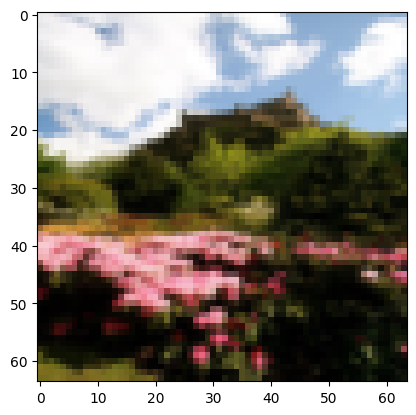

In [7]:
# Visualizar un dato
plt.imshow(xtrain[32])

Ahora vamos a tomar todos los datos y ponerlos en una solamente dirección. Es decir, se transforman de una matriz a un vector.

Dado que son tres matrices (formato RGB) de tamaño 64x64 cada una. Entonces, el vector tendría una dimensión de:

$$64x64x3 = 12288$$

Adicional a esto, se hace una normalización, en donde se divide por 255.

In [8]:
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

### **Punto#1:**Construir un clase que permita definir una red neuronal con la topología deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal.

### **Punto#2:** Construir un generalizacion de la red, en el que entrada el valor inicial y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

In [21]:
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    """
    Esta funcion permite generar semillas iniciales para un modelo de redes neuronales.
    Permite crear una semilla con la matriz de entradas a las neuronas \Theta, es decir,
    lo que proviene de una neurona con una característica determinada.
    Se tiene en cuenta los valores nlayer ya que esto permite conservar la dimensionalidad
    del problema.

    Inputs:
      act_fun: se ingresa una función con la cual se hace la clasificacion
      nlayer_present: cantidad de neuronas en la capa en estudio
      nlayer_before: cantidad de neuronas en la capa anterior.

    Output:

    """
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    """
      Esta función permite actualizar los vectores.

      Inputs:
        Z: Salidas de las neuronas.
        A: Entradas de las neuronas

      Outputs:
    """
    self.Z = Z
    self.A = A

def act_function(x, activation):
  """
    Esta función permite el calculo de una función de activación, la cual
    permite obtener el valor de clasificación.
  """
  if activation=="sigmoid":
    # Calcula la funcion sigmoide y su derivada
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f(x), fp

  elif activation == "tanh":
    f = lambda x: np.tanh(x)
    return f
  else :
    return 0

def forward_pass(nn):
  """
    Permite calcular el forward de toda una red neuronal.

    Input:
      nn (list): red neuronal

    Output:
      A (vect): LLeva información de la salida despues de los datos pasar por toda la red neuronal
  """
  for i in range(0, len(nn)):
    # Se implementan las demostraciones realizadas.
    if i != 0:
      Z = nn[i].theta @ nn[i - 1 ].A + nn[i].B
    else:
      Z = nn[i].theta @ xtrain_.T + nn[i].B

    A, Ap = act_function(Z, nn[i].act_fun) # Calculado Z se puede calcular A y su derivada

    nn[i].output(Z, A) # Se actualiza la entrada de la neurona

  return A, Ap

In [22]:
n = len(xtrain_[0]) # En la primera capa debe ir todo el conjunto de caracteristicas de cada imagen
topology = [np.random.randint(1,10) for i in range(0,5)] # Se crea una topologia aleatoria para la red
topology.insert(0, n) # Se inserta en la primera entrada las features
topology.append(1) # Se inserta en la ultima capa una unica red que de la salida

In [23]:
nn = [] # Se crea una lista vacia
i = 1 # Se inicializa un contador que arranca desde i = 1 ya que sobre las features no se opera
while i < len(topology):
  nn.append(layer_nn("sigmoid", topology[i], topology[i-1])) # Se inserta en una lista la llamada de la clase
  i += 1

In [24]:
Afin, AfinP = forward_pass(nn) # calcula el forward_pass para cada una de las imagenes
print(np.shape(Afin))

(1, 209)


In [25]:
print(Afin)

[[0.29573346 0.29576687 0.29573346 0.29573516 0.29573346 0.29652766
  0.29583576 0.29573382 0.29573346 0.29573346 0.29573346 0.29649928
  0.29575228 0.29573346 0.29573346 0.29573346 0.2957739  0.29648159
  0.29573346 0.29624682 0.29573346 0.29573346 0.29573346 0.29579224
  0.29573346 0.29574528 0.29585352 0.29573346 0.29652735 0.29573354
  0.29652253 0.29573346 0.2965273  0.29573346 0.29652771 0.29573354
  0.29573346 0.29573346 0.2965202  0.29573346 0.29573346 0.29573643
  0.295854   0.29573346 0.29573352 0.29573346 0.29573346 0.29573346
  0.29652772 0.29573346 0.29573346 0.2957335  0.29573346 0.29573346
  0.29616264 0.29651767 0.29573346 0.29573346 0.29573346 0.2957335
  0.29573346 0.29573912 0.29573346 0.29573382 0.29573346 0.29573348
  0.29573346 0.29573365 0.29573346 0.29573346 0.29573346 0.29573346
  0.29573356 0.29573346 0.29573346 0.29573346 0.2965277  0.29652771
  0.29652772 0.29651124 0.29652772 0.29573346 0.29573348 0.2957362
  0.29652764 0.29643869 0.29573346 0.29573376 0.29

### **Punto#3:** Encontrar la función de coste:

$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [26]:
def FuncionCoste(a,y):
  sum = 0
  for i in range(0,len(a)):
    oper1 = - y[i] * np.log(a[i])
    oper2 = - (1-y[i]) * np.log(1 - a[i])
    sum = sum + (oper1 + oper2)/len(a[0])

  return sum

In [27]:
J = FuncionCoste(Afin, train_label)
print(J)

[0.0016775  0.00167773 0.0016775  0.00167752 0.0016775  0.0016829
 0.0016782  0.00167751 0.0016775  0.0016775  0.0016775  0.00168271
 0.00167763 0.0016775  0.0016775  0.0016775  0.00167778 0.00168259
 0.0016775  0.00168099 0.0016775  0.0016775  0.0016775  0.0016779
 0.0016775  0.00167758 0.00167832 0.0016775  0.0016829  0.0016775
 0.00168287 0.0016775  0.0016829  0.0016775  0.0016829  0.0016775
 0.0016775  0.0016775  0.00168285 0.0016775  0.0016775  0.00167752
 0.00167832 0.0016775  0.0016775  0.0016775  0.0016775  0.0016775
 0.0016829  0.0016775  0.0016775  0.0016775  0.0016775  0.0016775
 0.00168042 0.00168284 0.0016775  0.0016775  0.0016775  0.0016775
 0.0016775  0.00167754 0.0016775  0.00167751 0.0016775  0.0016775
 0.0016775  0.00167751 0.0016775  0.0016775  0.0016775  0.0016775
 0.0016775  0.0016775  0.0016775  0.0016775  0.0016829  0.0016829
 0.0016829  0.00168279 0.0016829  0.0016775  0.0016775  0.00167752
 0.0016829  0.0016823  0.0016775  0.00167751 0.0016775  0.00167756
 0.00

In [41]:
dAl = np.divide(np.array(train_label), np.array(Afin)) - np.divide(1 - np.array(train_label), 1 - np.array(Afin)) # dim=(1,209)

dzl = dAl * AfinP # (1, 209) * (1 x 209) --> dim(dzl) = (1,209) debe tener mismas dim de A[l]

dThetaL = (1 / 209) w* dzl @ Afin.transpose() #




# dzl = dAl[-1] * AfinP[-1]
# dthetal = (1/209) * dzl *




(1, 209)


In [45]:
print(Afin)

[[0.29573346 0.29576687 0.29573346 0.29573516 0.29573346 0.29652766
  0.29583576 0.29573382 0.29573346 0.29573346 0.29573346 0.29649928
  0.29575228 0.29573346 0.29573346 0.29573346 0.2957739  0.29648159
  0.29573346 0.29624682 0.29573346 0.29573346 0.29573346 0.29579224
  0.29573346 0.29574528 0.29585352 0.29573346 0.29652735 0.29573354
  0.29652253 0.29573346 0.2965273  0.29573346 0.29652771 0.29573354
  0.29573346 0.29573346 0.2965202  0.29573346 0.29573346 0.29573643
  0.295854   0.29573346 0.29573352 0.29573346 0.29573346 0.29573346
  0.29652772 0.29573346 0.29573346 0.2957335  0.29573346 0.29573346
  0.29616264 0.29651767 0.29573346 0.29573346 0.29573346 0.2957335
  0.29573346 0.29573912 0.29573346 0.29573382 0.29573346 0.29573348
  0.29573346 0.29573365 0.29573346 0.29573346 0.29573346 0.29573346
  0.29573356 0.29573346 0.29573346 0.29573346 0.2965277  0.29652771
  0.29652772 0.29651124 0.29652772 0.29573346 0.29573348 0.2957362
  0.29652764 0.29643869 0.29573346 0.29573376 0.29

In [46]:
print(topology)

[12288, 1, 3, 7, 9, 9, 1]
